<a href="https://colab.research.google.com/github/samietex/Churn_Modelling_ANN/blob/main/ChurnRatePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [ ]:
print(dataset)


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


In [ ]:
# Encoding categorical data
# For the Location column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [ ]:
print(X)


[[619 0 'Female' ... 1 1 101348.88]
 [608 2 'Female' ... 0 1 112542.58]
 [502 0 'Female' ... 1 0 113931.57]
 ...
 [709 0 'Female' ... 0 1 42085.58]
 [772 1 'Male' ... 1 0 92888.52]
 [792 0 'Female' ... 1 0 38190.78]]


In [ ]:
# For the Gender column
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [ ]:
print(X)

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]


In [ ]:
#To create the dummy variables for the Location column
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

X = X[:, 1:]

In [ ]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.5698444   1.74309049  0.16958176 ...  0.64259497 -1.03227043
   1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945 ...  0.64259497  0.9687384
  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [-0.5698444  -0.57369368  0.9015152  ...  0.64259497 -1.03227043
   1.41231994]
 [-0.5698444   1.74309049 -0.62420521 ...  0.64259497  0.9687384
   0.84432121]
 [ 1.75486502 -0.57369368 -0.28401079 ...  0.64259497 -1.03227043
   0.32472465]]


In [ ]:
print(X_test)

[[ 1.75486502 -0.57369368 -0.55204276 ...  0.64259497  0.9687384
   1.61085707]
 [-0.5698444  -0.57369368 -1.31490297 ...  0.64259497 -1.03227043
   0.49587037]
 [-0.5698444   1.74309049  0.57162971 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-0.5698444   1.74309049 -0.74791227 ...  0.64259497 -1.03227043
   0.71888467]
 [ 1.75486502 -0.57369368 -0.00566991 ...  0.64259497  0.9687384
  -1.54507805]
 [ 1.75486502 -0.57369368 -0.79945688 ...  0.64259497 -1.03227043
   1.61255917]]


In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, activation = 'relu', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(6, activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(6, activation = 'relu'))

# Adding the fourth hidden layer
classifier.add(Dense(6, activation = 'relu'))

# Adding the fifth hidden layer
classifier.add(Dense(6, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 5s 4ms/step - loss: 0.5113 - accuracy: 0.7872
Epoch 2/100
800/800 [==============================] - 6s 7ms/step - loss: 0.4360 - accuracy: 0.7952
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4178 - accuracy: 0.8001
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4032 - accuracy: 0.8124
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3911 - accuracy: 0.8206
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3826 - accuracy: 0.8303
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3750 - accuracy: 0.8376
Epoch 8/100
800/800 [==============================] - 5s 7ms/step - loss: 0.3710 - accuracy: 0.8425
Epoch 9/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3676 - accuracy: 0.8440
Epoch 10/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3658 - accura

In [ ]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 6)                 72        
                                                                 
 dense_48 (Dense)            (None, 6)                 42        
                                                                 
 dense_49 (Dense)            (None, 6)                 42        
                                                                 
 dense_50 (Dense)            (None, 6)                 42        
                                                                 
 dense_51 (Dense)            (None, 6)                 42        
                                                                 
 dense_52 (Dense)            (None, 1)                 7         
                                                                 
 dense_53 (Dense)            (None, 6)                

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1534,   61],
       [ 212,  193]])

In [ ]:
accuracy = (1534 + 193)/2000


In [ ]:
accuracy

0.8635

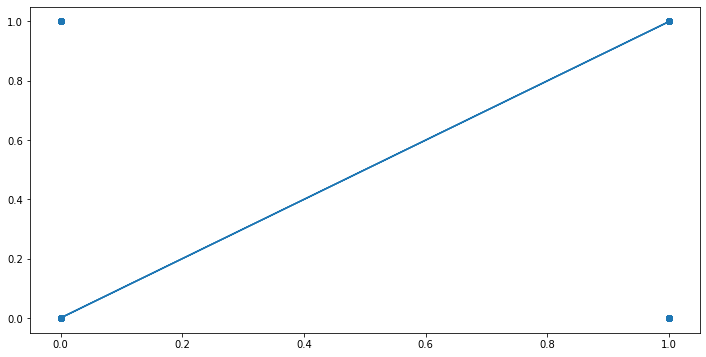

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


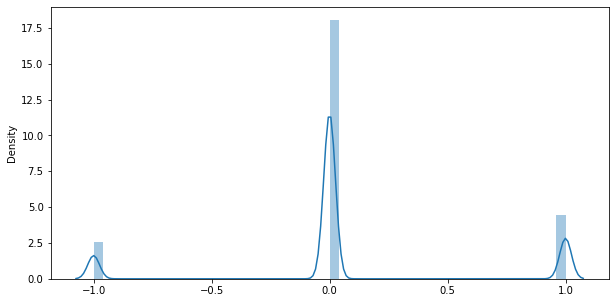

In [ ]:
# visualizing residuals
import seaborn as sns
vizz = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

TypeError: ignored